In [14]:
import pandas as pd
import scanpy as sc
from scipy.io import mmread
from scipy import sparse
import seaborn as sns
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import h5py
import csv
import os
import loompy
import anndata
from pandas import HDFStore
from sklearn.manifold import TSNE
import collections
import scipy.sparse as sp_sparse
import tables
import plotly.express as px
from sklearn.preprocessing import StandardScaler

## Data Loading

In [15]:
genes = pd.read_csv("../Data/Genes.csv")
barcode_positions = pd.read_csv("../Data/SpotPositions.csv")
tSNE_df = pd.read_csv("../Data/t-SNE_Projection.csv")
tSNE_graphed_df = pd.read_csv("../Data/t-SNE_Graph_Based.csv")

In [16]:
up_regulated_L2FC_genes = pd.read_csv("../Data/up_regulated_L2FC_genes.csv")
down_regulated_L2FC_genes = pd.read_csv("../Data/down_regulated_L2FC_genes.csv")

In [17]:
feature_matrix_precise = mmread("../Data/FeatureMatrix_precise.mtx")

In [18]:
adata = sc.read_10x_h5("../Data/Filtered_feature_bc_matrix.h5")

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


## Data Display

In [19]:
genes

,gene,feature_type
0,Xkr4,Gene Expression
1,Gm1992,Gene Expression
2,Gm37381,Gene Expression
3,Rp1,Gene Expression
4,Sox17,Gene Expression
...,...,...
31048,AC168977.1,Gene Expression
31049,AC149090.1,Gene Expression
31050,CAAA01118383.1,Gene Expression
31051,Vmn2r122,Gene Expression


In [20]:
barcode_positions

,barcode,x,y,radius
0,AAACAAGTATCTCCCA-1,12709.0,10806.0,71.192911
1,AAACACCAATAACTGC-1,3616.0,12513.0,71.192911
2,AAACAGAGCGACTCCT-1,11839.0,3944.0,71.192911
3,AAACAGGGTCTATATT-1,2961.0,10225.0,71.192911
4,AAACATTTCCCGGATT-1,12159.0,12902.0,71.192911
...,...,...,...,...
3494,TTGTTGTGTGTCAAGA-1,9974.0,7183.0,71.192911
3495,TTGTTTCACATCCAGG-1,6136.0,12325.0,71.192911
3496,TTGTTTCATTAGTCTA-1,4821.0,12705.0,71.192911
3497,TTGTTTCCATACAACT-1,4495.0,9846.0,71.192911


In [21]:
tSNE_df

,Barcode,X Coordinate,Y Coordinate
0,AAACAAGTATCTCCCA-1,7.170149,-6.169523
1,AAACACCAATAACTGC-1,-24.983043,-8.407789
2,AAACAGAGCGACTCCT-1,-12.087320,36.968580
3,AAACAGGGTCTATATT-1,-21.366652,-5.311882
4,AAACATTTCCCGGATT-1,11.085326,-17.753664
...,...,...,...
3494,TTGTTGTGTGTCAAGA-1,35.546637,-23.506554
3495,TTGTTTCACATCCAGG-1,-3.515596,15.672737
3496,TTGTTTCATTAGTCTA-1,-20.753882,-5.643660
3497,TTGTTTCCATACAACT-1,-9.796795,22.895259


In [22]:
tSNE_graphed_df

,Barcode,Graph-based
0,AAACAAGTATCTCCCA-1,Cluster 2
1,AAACACCAATAACTGC-1,Cluster 4
2,AAACAGAGCGACTCCT-1,Cluster 6
3,AAACAGGGTCTATATT-1,Cluster 5
4,AAACATTTCCCGGATT-1,Cluster 2
...,...,...
3494,TTGTTGTGTGTCAAGA-1,Cluster 5
3495,TTGTTTCACATCCAGG-1,Cluster 1
3496,TTGTTTCATTAGTCTA-1,Cluster 3
3497,TTGTTTCCATACAACT-1,Cluster 7


In [23]:
up_regulated_L2FC_genes

,FeatureID,FeatureName,Cluster 1 Average,Cluster 1 Log2 Fold Change,Cluster 1 P-Value,Cluster 2 Average,Cluster 2 Log2 Fold Change,Cluster 2 P-Value,Cluster 3 Average,Cluster 3 Log2 Fold Change,...,Cluster 6 P-Value,Cluster 7 Average,Cluster 7 Log2 Fold Change,Cluster 7 P-Value,Cluster 8 Average,Cluster 8 Log2 Fold Change,Cluster 8 P-Value,Cluster 9 Average,Cluster 9 Log2 Fold Change,Cluster 9 P-Value
0,ENSMUSG00000026344,Lypd1,5.274823,2.993237,8.343679e-50,0.574604,-1.795078,0.000128,1.003316,-0.926066,...,0.000359,0.559763,-1.886218,9.328407e-07,1.135633,-0.756241,4.129231e-01,0.727973,-1.368460,1.0
1,ENSMUSG00000045573,Penk,5.499242,2.478801,1.178593e-28,1.204652,-0.907644,0.218760,1.003316,-1.147330,...,1.000000,0.644255,-1.899512,1.020071e-05,0.834278,-1.441520,3.524474e-02,1.361403,-0.679557,1.0
2,ENSMUSG00000071379,Hpcal1,3.581923,2.091830,1.407899e-26,1.875024,0.308009,0.703854,0.833867,-0.931656,...,0.001595,0.918856,-0.848315,7.454362e-02,0.682014,-1.249573,2.749374e-02,0.444347,-1.812791,1.0
3,ENSMUSG00000040565,Btaf1,1.689973,1.720945,5.081825e-17,0.315024,-1.462562,0.001502,0.931969,0.202525,...,0.197208,0.670659,-0.326263,9.336061e-01,0.434586,-0.962119,1.504582e-01,0.614522,-0.412310,1.0
4,ENSMUSG00000068696,Gpr88,1.309436,1.809333,1.637077e-16,0.136090,-2.274629,0.000003,0.459296,-0.436956,...,0.576842,0.237635,-1.506374,3.138400e-04,0.066615,-3.252758,4.845342e-08,0.283626,-1.105550,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,ENSMUSG00000024991,Eif3a,0.912312,0.067565,1.000000e+00,1.063521,0.304276,0.719242,0.833867,-0.083417,...,1.000000,0.853727,-0.053208,1.000000e+00,0.812072,-0.126963,1.000000e+00,0.756335,-0.222079,1.0
1405,ENSMUSG00000064341,mt-Nd1,111.716779,0.077072,1.000000e+00,105.510399,-0.031026,1.000000,168.717580,0.696516,...,0.302693,92.517551,-0.249757,1.000000e+00,62.152093,-0.844279,1.567308e-01,152.203004,0.507060,1.0
1406,ENSMUSG00000064351,mt-Co1,346.376167,0.063527,1.000000e+00,287.652304,-0.246331,0.915168,598.850198,0.901104,...,0.119922,301.317933,-0.179860,1.000000e+00,186.776668,-0.901889,1.160769e-01,476.566806,0.511451,1.0
1407,ENSMUSG00000064356,mt-Atp8,2.994531,0.037391,1.000000e+00,2.527754,-0.240526,0.932790,7.629659,1.517481,...,0.385615,1.999656,-0.630584,2.607485e-01,1.291068,-1.254722,2.230199e-02,5.237621,0.855277,1.0


In [24]:
down_regulated_L2FC_genes

,FeatureID,FeatureName,Cluster 1 Average,Cluster 1 Log2 Fold Change,Cluster 1 P-Value,Cluster 2 Average,Cluster 2 Log2 Fold Change,Cluster 2 P-Value,Cluster 3 Average,Cluster 3 Log2 Fold Change,...,Cluster 6 P-Value,Cluster 7 Average,Cluster 7 Log2 Fold Change,Cluster 7 P-Value,Cluster 8 Average,Cluster 8 Log2 Fold Change,Cluster 8 P-Value,Cluster 9 Average,Cluster 9 Log2 Fold Change,Cluster 9 P-Value
0,ENSMUSG00000024985,Tcf7l2,0.150263,-3.018215,1.479988e-25,1.386106,0.626288,0.219379,0.365653,-1.412916,...,0.004688,0.126739,-3.078400,3.036486e-14,0.123714,-3.007867,1.514171e-07,0.586160,-0.696479,1.0
1,ENSMUSG00000027833,Shox2,0.014636,-4.052419,2.063851e-24,0.158772,-0.311949,0.972904,0.057969,-1.713863,...,0.000029,0.014082,-3.837069,3.928604e-12,0.015861,-3.476344,5.945260e-06,0.047271,-1.829279,1.0
2,ENSMUSG00000064179,Tnnt1,0.034151,-3.366564,2.249445e-22,0.181454,-0.649206,0.524972,0.049051,-2.448745,...,0.305224,0.056328,-2.437509,1.500943e-07,0.038066,-2.856960,2.465041e-05,0.085088,-1.592387,1.0
3,ENSMUSG00000032368,Zic1,0.065374,-3.028096,6.860338e-22,0.869467,1.243062,0.000526,0.459296,0.152956,...,0.011427,0.035205,-3.706669,2.402178e-15,0.088820,-2.282609,2.275061e-04,0.236355,-0.795744,1.0
4,ENSMUSG00000041046,Ramp3,0.201977,-2.425980,3.138713e-18,0.866946,0.013508,1.000000,0.321061,-1.461218,...,0.001260,0.549201,-0.729616,2.515751e-01,0.218879,-2.048077,2.744325e-04,0.425439,-1.017069,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,ENSMUSG00000024639,Gnaq,1.215766,-0.077901,1.000000e+00,1.396187,0.157301,0.954542,1.047908,-0.287421,...,0.018413,1.327237,0.079784,1.000000e+00,1.601940,0.371810,6.350297e-01,1.134503,-0.163462,1.0
1613,ENSMUSG00000025190,Got1,3.371164,-0.067665,1.000000e+00,4.145717,0.276425,0.798089,2.100274,-0.769804,...,0.001614,4.157736,0.297921,8.688238e-01,3.930304,0.184115,9.949168e-01,2.760623,-0.354858,1.0
1614,ENSMUSG00000025204,Ndufb8,3.060881,-0.025385,1.000000e+00,3.157802,0.027354,1.000000,2.425795,-0.376112,...,1.000000,3.654302,0.279527,9.169802e-01,3.876377,0.350814,7.213765e-01,2.741715,-0.190196,1.0
1615,ENSMUSG00000025035,Arl3,2.150520,-0.048426,1.000000e+00,2.321098,0.081116,1.000000,1.627601,-0.462366,...,0.711797,2.143998,-0.047794,1.000000e+00,2.350569,0.098524,1.000000e+00,1.966472,-0.175483,1.0


In [25]:
# TTGGATATCGTCTACG-1 and TGCGCCGTTAATAACG-1 index 
missing_cell_index1 = barcode_positions.index[barcode_positions['barcode'] == 'TTGGATATCGTCTACG-1'].tolist()[0]
missing_cell_index2 = barcode_positions.index[barcode_positions['barcode'] == 'TGCGCCGTTAATAACG-1'].tolist()[0]
print(missing_cell_index1, missing_cell_index2)


3463 3154


In [26]:
feature_matrix_precise

<31053x3499 sparse matrix of type '<class 'numpy.int64'>'
	with 13742662 stored elements in COOrdinate format>

## Data Processing

In [27]:
df_tsne_graphed_position_cluster = pd.merge(tSNE_graphed_df, tSNE_df, on='Barcode')
df_tsne_graphed_position_cluster

,Barcode,Graph-based,X Coordinate,Y Coordinate
0,AAACAAGTATCTCCCA-1,Cluster 2,7.170149,-6.169523
1,AAACACCAATAACTGC-1,Cluster 4,-24.983043,-8.407789
2,AAACAGAGCGACTCCT-1,Cluster 6,-12.087320,36.968580
3,AAACAGGGTCTATATT-1,Cluster 5,-21.366652,-5.311882
4,AAACATTTCCCGGATT-1,Cluster 2,11.085326,-17.753664
...,...,...,...,...
3494,TTGTTGTGTGTCAAGA-1,Cluster 5,35.546637,-23.506554
3495,TTGTTTCACATCCAGG-1,Cluster 1,-3.515596,15.672737
3496,TTGTTTCATTAGTCTA-1,Cluster 3,-20.753882,-5.643660
3497,TTGTTTCCATACAACT-1,Cluster 7,-9.796795,22.895259


In [28]:
df_precise = pd.DataFrame.sparse.from_spmatrix(feature_matrix_precise)
df_precise.T

,0,1,2,3,4,5,6,7,8,9,...,31043,31044,31045,31046,31047,31048,31049,31050,31051,31052
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3495,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,0,0,0,0,0,0,3,0,0,3,...,0,0,0,0,0,0,1,0,0,0


In [29]:
df_precise = pd.DataFrame.sparse.from_spmatrix(feature_matrix_precise)

df_precise.columns = barcode_positions['barcode'].values
df_precise.index = genes['gene'].values

df_precise = df_precise.transpose()
df_precise.index.name = 'barcode'
df_precise

,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
barcode,,,,,,,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACACCAATAACTGC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGAGCGACTCCT-1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,0,0
AAACAGGGTCTATATT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACATTTCCCGGATT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TTGTTTCACATCCAGG-1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TTGTTTCATTAGTCTA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
showing = df_precise.iloc[0, :42]
df_display = pd.DataFrame([showing])
df_display.columns = range(1, 43)
df_display.T

,AAACAAGTATCTCCCA-1
1,0
2,0
3,0
4,0
5,0
6,0
7,2
8,0
9,0
10,0


In [31]:
tSNE_df.rename(columns={'X Coordinate': 'x', 'Y Coordinate': 'y', 'Barcode': 'barcode'}, inplace=True)
adata.var_names_make_unique()
umi_counts = adata.to_df()

total_counts = umi_counts.sum(axis=1)
cellTotal_df = pd.DataFrame(
    {"barcode": total_counts.index, "total_counts": total_counts.values}
)
cellTotal_df

,barcode,total_counts
0,AAACAAGTATCTCCCA-1,12174.0
1,AAACACCAATAACTGC-1,5637.0
2,AAACAGAGCGACTCCT-1,26316.0
3,AAACAGGGTCTATATT-1,6462.0
4,AAACATTTCCCGGATT-1,7195.0
...,...,...
3494,TTGTTGTGTGTCAAGA-1,6219.0
3495,TTGTTTCACATCCAGG-1,14493.0
3496,TTGTTTCATTAGTCTA-1,6621.0
3497,TTGTTTCCATACAACT-1,18042.0


In [32]:
umi_df = umi_counts
umi_df.reset_index(inplace=True)
umi_df.rename(columns={'index': 'barcode'}, inplace=True)
umi_df

,barcode,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
0,AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,AAACAGGGTCTATATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAACATTTCCCGGATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,TTGTTGTGTGTCAAGA-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3495,TTGTTTCACATCCAGG-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3496,TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3497,TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
tSNE_graphed_df.rename(columns={'Barcode': 'barcode'}, inplace=True)
tSNE_graphed_df

,barcode,Graph-based
0,AAACAAGTATCTCCCA-1,Cluster 2
1,AAACACCAATAACTGC-1,Cluster 4
2,AAACAGAGCGACTCCT-1,Cluster 6
3,AAACAGGGTCTATATT-1,Cluster 5
4,AAACATTTCCCGGATT-1,Cluster 2
...,...,...
3494,TTGTTGTGTGTCAAGA-1,Cluster 5
3495,TTGTTTCACATCCAGG-1,Cluster 1
3496,TTGTTTCATTAGTCTA-1,Cluster 3
3497,TTGTTTCCATACAACT-1,Cluster 7


In [34]:
total_cell_df = pd.merge(cellTotal_df, umi_df, on='barcode')
total_cell_df

,barcode,total_counts,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
0,AAACAAGTATCTCCCA-1,12174.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAACACCAATAACTGC-1,5637.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAACAGAGCGACTCCT-1,26316.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,AAACAGGGTCTATATT-1,6462.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAACATTTCCCGGATT-1,7195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,TTGTTGTGTGTCAAGA-1,6219.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3495,TTGTTTCACATCCAGG-1,14493.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3496,TTGTTTCATTAGTCTA-1,6621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3497,TTGTTTCCATACAACT-1,18042.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
#log2 transformation
umi_df.loc[:, umi_df.columns != 'barcode'] = np.log2(umi_df.loc[:, umi_df.columns != 'barcode'] + 1)
umi_df

,barcode,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
0,AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,1.584962,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.584962,0.0,0.0,0.0
3,AAACAGGGTCTATATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,AAACATTTCCCGGATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,TTGTTGTGTGTCAAGA-1,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3495,TTGTTTCACATCCAGG-1,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3496,TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3497,TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


In [36]:
# logNormalize
total_cell_df.loc[:, total_cell_df.columns != 'barcode'] = total_cell_df.loc[:, total_cell_df.columns != 'barcode'].div(total_cell_df['total_counts'], axis=0) * 10000

total_cell_df.loc[:, total_cell_df.columns != 'barcode'] = np.log1p(total_cell_df.loc[:, total_cell_df.columns != 'barcode'])
total_cell_df

,barcode,total_counts,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
0,AAACAAGTATCTCCCA-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.971856,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,AAACACCAATAACTGC-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,AAACAGAGCGACTCCT-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.322081,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.565310,0.0,0.0,0.0
3,AAACAGGGTCTATATT-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,AAACATTTCCCGGATT-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,TTGTTGTGTGTCAAGA-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.958574,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.958574,0.0,0.0,0.0
3495,TTGTTTCACATCCAGG-1,9.210441,0.524722,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.524722,0.0,0.0,0.0
3496,TTGTTTCATTAGTCTA-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3497,TTGTTTCCATACAACT-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.979373,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.441001,0.0,0.0,0.0


In [37]:
violin_logNorm_df = pd.merge(total_cell_df, tSNE_graphed_df, on='barcode')
violin_logNorm_df

,barcode,total_counts,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,...,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1,Graph-based
0,AAACAAGTATCTCCCA-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.971856,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Cluster 2
1,AAACACCAATAACTGC-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Cluster 4
2,AAACAGAGCGACTCCT-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.322081,0.0,...,0.0,0.0,0.0,0.0,0.0,0.565310,0.0,0.0,0.0,Cluster 6
3,AAACAGGGTCTATATT-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Cluster 5
4,AAACATTTCCCGGATT-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,TTGTTGTGTGTCAAGA-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.958574,0.0,...,0.0,0.0,0.0,0.0,0.0,0.958574,0.0,0.0,0.0,Cluster 5
3495,TTGTTTCACATCCAGG-1,9.210441,0.524722,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.524722,0.0,0.0,0.0,Cluster 1
3496,TTGTTTCATTAGTCTA-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Cluster 3
3497,TTGTTTCCATACAACT-1,9.210441,0.000000,0.0,0.0,0.0,0.0,0.0,0.979373,0.0,...,0.0,0.0,0.0,0.0,0.0,0.441001,0.0,0.0,0.0,Cluster 7


In [38]:
violin_df = pd.merge(tSNE_graphed_df, umi_df, on='barcode')
violin_df

,barcode,Graph-based,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
0,AAACAAGTATCTCCCA-1,Cluster 2,0.0,0.0,0.0,0.0,0.0,0.0,1.584962,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,AAACACCAATAACTGC-1,Cluster 4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,AAACAGAGCGACTCCT-1,Cluster 6,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.584962,0.0,0.0,0.0
3,AAACAGGGTCTATATT-1,Cluster 5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,AAACATTTCCCGGATT-1,Cluster 2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,TTGTTGTGTGTCAAGA-1,Cluster 5,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3495,TTGTTTCACATCCAGG-1,Cluster 1,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3496,TTGTTTCATTAGTCTA-1,Cluster 3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3497,TTGTTTCCATACAACT-1,Cluster 7,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


In [39]:
cell_tsne_df = pd.merge(cellTotal_df, tSNE_df, on="barcode")
# cell_tsne_df
cell_tsne_cluster_UMI_df = pd.merge(cell_tsne_df, tSNE_graphed_df, on="barcode", how="left")
cell_tsne_cluster_UMI_df

,barcode,total_counts,x,y,Graph-based
0,AAACAAGTATCTCCCA-1,12174.0,7.170149,-6.169523,Cluster 2
1,AAACACCAATAACTGC-1,5637.0,-24.983043,-8.407789,Cluster 4
2,AAACAGAGCGACTCCT-1,26316.0,-12.087320,36.968580,Cluster 6
3,AAACAGGGTCTATATT-1,6462.0,-21.366652,-5.311882,Cluster 5
4,AAACATTTCCCGGATT-1,7195.0,11.085326,-17.753664,Cluster 2
...,...,...,...,...,...
3494,TTGTTGTGTGTCAAGA-1,6219.0,35.546637,-23.506554,Cluster 5
3495,TTGTTTCACATCCAGG-1,14493.0,-3.515596,15.672737,Cluster 1
3496,TTGTTTCATTAGTCTA-1,6621.0,-20.753882,-5.643660,Cluster 3
3497,TTGTTTCCATACAACT-1,18042.0,-9.796795,22.895259,Cluster 7


### Wrong test of feature id, gene name, and barcode

In [40]:
with h5py.File('../Data/Filtered_feature_bc_matrix.h5', 'r') as file:
    matrix_group = file['matrix']
    
    # Load barcodes, assuming it is directly extractable and each barcode is unique
    barcodes = [barcode.decode() for barcode in matrix_group['barcodes'][:]]
    
    # Access the 'features' subgroup to get gene names and IDs
    features_group = matrix_group['features']
    gene_names = [name.decode() for name in features_group['name'][:]]  # Decode bytes to string
    gene_ids = [gene_id.decode() for gene_id in features_group['id'][:]]  # Assuming 'id' is also stored as bytes

    # Generate DataFrame
    # Since the number of unique barcodes should match with the total entries in 'features', you need to create a DataFrame
    # where each barcode is repeated for the number of genes, and gene information is paired accordingly.
    # This assumes there is a one-to-many relationship between a single barcode and multiple genes.

    # The following code assumes each barcode is associated with all gene entries, which might need adjustment based on your actual data structure.
    df_data = {'Barcode': barcodes * len(gene_names), 'Gene Name': gene_names * len(barcodes), 'Gene ID': gene_ids * len(barcodes)}
    df = pd.DataFrame(df_data)

    # df.to_csv('gene_expression_data.csv', index=False)

    print(df.head()) 


              Barcode Gene Name             Gene ID
0  AAACAAGTATCTCCCA-1      Xkr4  ENSMUSG00000051951
1  AAACACCAATAACTGC-1    Gm1992  ENSMUSG00000089699
2  AAACAGAGCGACTCCT-1   Gm37381  ENSMUSG00000102343
3  AAACAGGGTCTATATT-1       Rp1  ENSMUSG00000025900
4  AAACATTTCCCGGATT-1     Sox17  ENSMUSG00000025902


——————————————————————————————————Dividing line——————————————————————————————————

In [41]:
with h5py.File('../Data/Filtered_feature_bc_matrix.h5', 'r') as file:
    matrix_group = file['matrix']
    
    # Access the 'features' subgroup to get gene names and IDs
    features_group = matrix_group['features']
    gene_names = [name.decode() for name in features_group['name'][:]]
    gene_ids = [gene_id.decode() for gene_id in features_group['id'][:]]

    # Generate DataFrame
    gene_featureid_name_df = pd.DataFrame({'FeatureID': gene_ids, 'Gene Name': gene_names})

gene_featureid_name_df


,FeatureID,Gene Name
0,ENSMUSG00000051951,Xkr4
1,ENSMUSG00000089699,Gm1992
2,ENSMUSG00000102343,Gm37381
3,ENSMUSG00000025900,Rp1
4,ENSMUSG00000025902,Sox17
...,...,...
31048,ENSMUSG00000079808,AC168977.1
31049,ENSMUSG00000095041,AC149090.1
31050,ENSMUSG00000063897,CAAA01118383.1
31051,ENSMUSG00000096730,Vmn2r122


In [42]:
# Using scanpy to read the 10x h5 file
adata = sc.read_10x_h5('../Data/Filtered_feature_bc_matrix.h5')

gene_names = adata.var_names
gene_ids = adata.var['gene_ids'] 

df_genes = pd.DataFrame({
    'FeatureID': gene_ids,
})

df_genes


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


,FeatureID
Xkr4,ENSMUSG00000051951
Gm1992,ENSMUSG00000089699
Gm37381,ENSMUSG00000102343
Rp1,ENSMUSG00000025900
Sox17,ENSMUSG00000025902
...,...
AC168977.1,ENSMUSG00000079808
AC149090.1,ENSMUSG00000095041
CAAA01118383.1,ENSMUSG00000063897
Vmn2r122,ENSMUSG00000096730


In [43]:
up_regulated_genes_processed_df = pd.merge(up_regulated_L2FC_genes, gene_featureid_name_df, on='FeatureID')
up_regulated_genes_processed_df

,FeatureID,FeatureName,Cluster 1 Average,Cluster 1 Log2 Fold Change,Cluster 1 P-Value,Cluster 2 Average,Cluster 2 Log2 Fold Change,Cluster 2 P-Value,Cluster 3 Average,Cluster 3 Log2 Fold Change,...,Cluster 7 Average,Cluster 7 Log2 Fold Change,Cluster 7 P-Value,Cluster 8 Average,Cluster 8 Log2 Fold Change,Cluster 8 P-Value,Cluster 9 Average,Cluster 9 Log2 Fold Change,Cluster 9 P-Value,Gene Name
0,ENSMUSG00000026344,Lypd1,5.274823,2.993237,8.343679e-50,0.574604,-1.795078,0.000128,1.003316,-0.926066,...,0.559763,-1.886218,9.328407e-07,1.135633,-0.756241,4.129231e-01,0.727973,-1.368460,1.0,Lypd1
1,ENSMUSG00000045573,Penk,5.499242,2.478801,1.178593e-28,1.204652,-0.907644,0.218760,1.003316,-1.147330,...,0.644255,-1.899512,1.020071e-05,0.834278,-1.441520,3.524474e-02,1.361403,-0.679557,1.0,Penk
2,ENSMUSG00000071379,Hpcal1,3.581923,2.091830,1.407899e-26,1.875024,0.308009,0.703854,0.833867,-0.931656,...,0.918856,-0.848315,7.454362e-02,0.682014,-1.249573,2.749374e-02,0.444347,-1.812791,1.0,Hpcal1
3,ENSMUSG00000040565,Btaf1,1.689973,1.720945,5.081825e-17,0.315024,-1.462562,0.001502,0.931969,0.202525,...,0.670659,-0.326263,9.336061e-01,0.434586,-0.962119,1.504582e-01,0.614522,-0.412310,1.0,Btaf1
4,ENSMUSG00000068696,Gpr88,1.309436,1.809333,1.637077e-16,0.136090,-2.274629,0.000003,0.459296,-0.436956,...,0.237635,-1.506374,3.138400e-04,0.066615,-3.252758,4.845342e-08,0.283626,-1.105550,1.0,Gpr88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,ENSMUSG00000024991,Eif3a,0.912312,0.067565,1.000000e+00,1.063521,0.304276,0.719242,0.833867,-0.083417,...,0.853727,-0.053208,1.000000e+00,0.812072,-0.126963,1.000000e+00,0.756335,-0.222079,1.0,Eif3a
1405,ENSMUSG00000064341,mt-Nd1,111.716779,0.077072,1.000000e+00,105.510399,-0.031026,1.000000,168.717580,0.696516,...,92.517551,-0.249757,1.000000e+00,62.152093,-0.844279,1.567308e-01,152.203004,0.507060,1.0,mt-Nd1
1406,ENSMUSG00000064351,mt-Co1,346.376167,0.063527,1.000000e+00,287.652304,-0.246331,0.915168,598.850198,0.901104,...,301.317933,-0.179860,1.000000e+00,186.776668,-0.901889,1.160769e-01,476.566806,0.511451,1.0,mt-Co1
1407,ENSMUSG00000064356,mt-Atp8,2.994531,0.037391,1.000000e+00,2.527754,-0.240526,0.932790,7.629659,1.517481,...,1.999656,-0.630584,2.607485e-01,1.291068,-1.254722,2.230199e-02,5.237621,0.855277,1.0,mt-Atp8


## Data Visualization

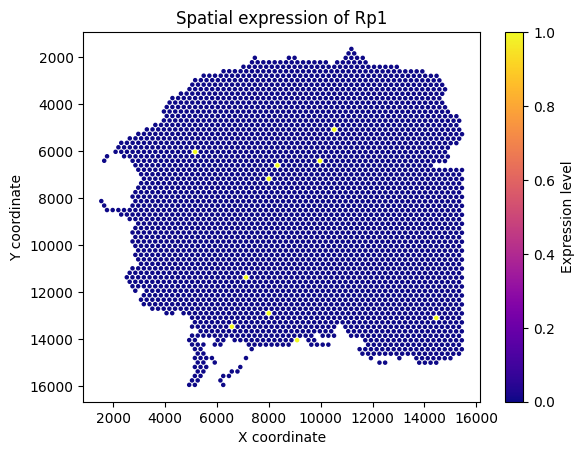

In [44]:
aligned_data = pd.merge(barcode_positions, df_precise, on='barcode')
aligned_data.drop(columns=['radius'], inplace=True)
gene_of_interest = "Rp1"

plt.scatter(
    aligned_data["x"],
    aligned_data["y"],
    c=aligned_data[gene_of_interest],
    cmap="plasma",
    s=5
)
plt.colorbar(label="Expression level")
plt.title(f"Spatial expression of {gene_of_interest}")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.gca().invert_yaxis()
plt.show()

In [45]:
plt.scatter(
    tSNE_df["X Coordinate"],
    tSNE_df["Y Coordinate"],
    s=5
)
plt.title(f"t-SNE projection")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()

KeyError: 'X Coordinate'

In [46]:
violin_df

,barcode,Graph-based,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
0,AAACAAGTATCTCCCA-1,Cluster 2,0.0,0.0,0.0,0.0,0.0,0.0,1.584962,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,AAACACCAATAACTGC-1,Cluster 4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,AAACAGAGCGACTCCT-1,Cluster 6,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.584962,0.0,0.0,0.0
3,AAACAGGGTCTATATT-1,Cluster 5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,AAACATTTCCCGGATT-1,Cluster 2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,TTGTTGTGTGTCAAGA-1,Cluster 5,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3495,TTGTTTCACATCCAGG-1,Cluster 1,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3496,TTGTTTCATTAGTCTA-1,Cluster 3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3497,TTGTTTCCATACAACT-1,Cluster 7,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


             min  median      mean       max  <lambda_0>
Graph-based                                             
Cluster 1    0.0     0.0  0.385723  3.321928         1.0
Cluster 2    0.0     0.0  0.262818  2.321928         0.0
Cluster 3    0.0     0.0  0.167186  4.000000         0.0
Cluster 4    0.0     0.0  0.250547  1.584962         0.0
Cluster 5    0.0     0.0  0.442925  2.584963         1.0
Cluster 6    0.0     0.0  0.179719  2.000000         0.0
Cluster 7    0.0     0.0  0.362435  2.000000         1.0
Cluster 8    0.0     0.0  0.292065  2.000000         1.0
Cluster 9    0.0     0.0  0.245908  1.584962         0.0


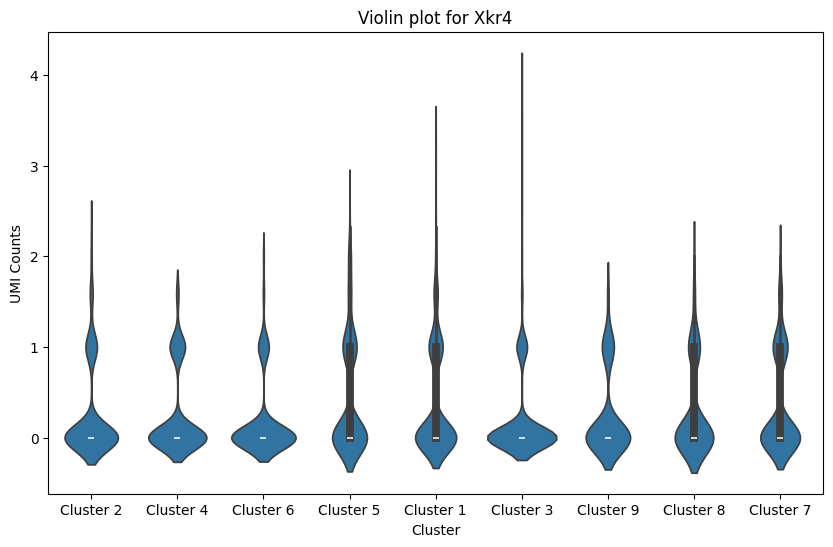

In [ ]:
gene_name = 'Xkr4'
data_to_plot = violin_df[['Graph-based', gene_name]]

# Calculating descriptive statistics for each cluster
cluster_stats = data_to_plot.groupby('Graph-based')[gene_name].agg(['min', 'median', 'mean', 'max', lambda x: x.quantile(0.75)]).rename(columns={'<lambda>': 'Q3'})
print(cluster_stats)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Graph-based', y=gene_name, data=data_to_plot)
plt.title(f'Violin plot for {gene_name}')
plt.xlabel('Cluster')
plt.ylabel('UMI Counts')
plt.show()


             min  median      mean       max  <lambda_0>
Graph-based                                             
Cluster 1    0.0     0.0  0.180297  2.137424    0.368602
Cluster 2    0.0     0.0  0.205214  2.159042    0.000000
Cluster 3    0.0     0.0  0.178306  3.665382    0.000000
Cluster 4    0.0     0.0  0.141771  1.231567    0.000000
Cluster 5    0.0     0.0  0.342200  1.755083    0.738038
Cluster 6    0.0     0.0  0.117023  1.546797    0.000000
Cluster 7    0.0     0.0  0.155643  0.905742    0.378323
Cluster 8    0.0     0.0  0.090150  0.676855    0.182145
Cluster 9    0.0     0.0  0.170340  1.104244    0.000000


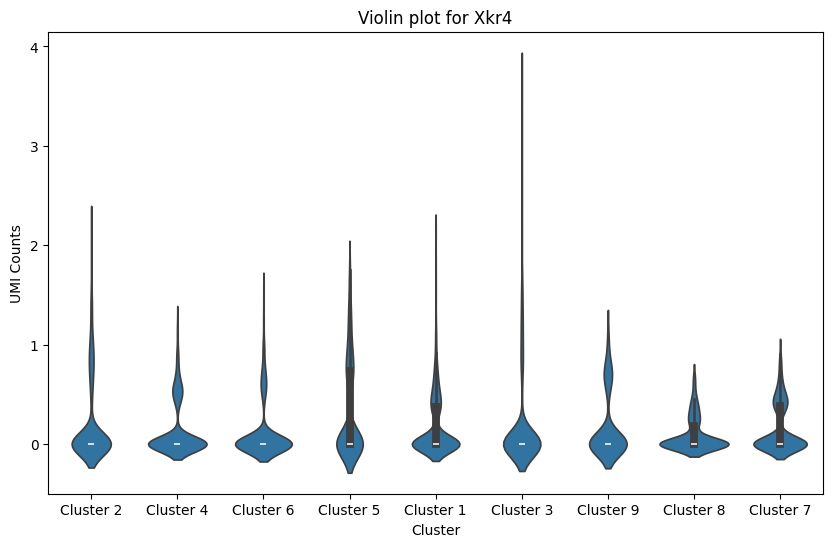

In [ ]:
gene_name = 'Xkr4'
data_to_plot = violin_logNorm_df[['Graph-based', gene_name]]

# Calculating descriptive statistics for each cluster
cluster_stats = data_to_plot.groupby('Graph-based')[gene_name].agg(['min', 'median', 'mean', 'max', lambda x: x.quantile(0.75)]).rename(columns={'<lambda>': 'Q3'})
print(cluster_stats)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Graph-based', y=gene_name, data=data_to_plot)
plt.title(f'Violin plot for {gene_name}')
plt.xlabel('Cluster')
plt.ylabel('UMI Counts')
plt.show()
